In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('../Student_Performance.csv')
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [5]:
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [6]:
corr_matrix = data.corr()
print(corr_matrix['Performance Index'])

Hours Studied                       0.373730
Previous Scores                     0.915189
Extracurricular Activities          0.024525
Sleep Hours                         0.048106
Sample Question Papers Practiced    0.043268
Performance Index                   1.000000
Name: Performance Index, dtype: float64


In [7]:
x = data.drop(['Performance Index'], axis=1)
y = data['Performance Index']

In [8]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [9]:
x = scaler.transform(x)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Ridge

In [12]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)

Ridge()

In [13]:
y_train_pred = ridge.predict(x_train)
y_test_pred = ridge.predict(x_test)

In [14]:
train_r2_ridge = r2_score(y_train, y_train_pred)
test_r2_ridge = r2_score(y_test, y_test_pred)

In [15]:
print(f"Train R^2 (Ridge): {train_r2_ridge}")
print(f"Test R^2 (Ridge): {test_r2_ridge}")
print(f"Train MSE (Ridge): {mean_squared_error(y_train, y_train_pred)}")
print(f"Test MSE (Ridge): {mean_squared_error(y_test, y_test_pred)}")

Train R^2 (Ridge): 0.988689863436342
Test R^2 (Ridge): 0.9889817178536919
Train MSE (Ridge): 4.16974161258158
Test MSE (Ridge): 4.08321136731029


C:\Users\Micha\AppData\Local\Temp\ipykernel_22960\1389609896.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred)


Text(0.5, 1.0, 'Residuals')

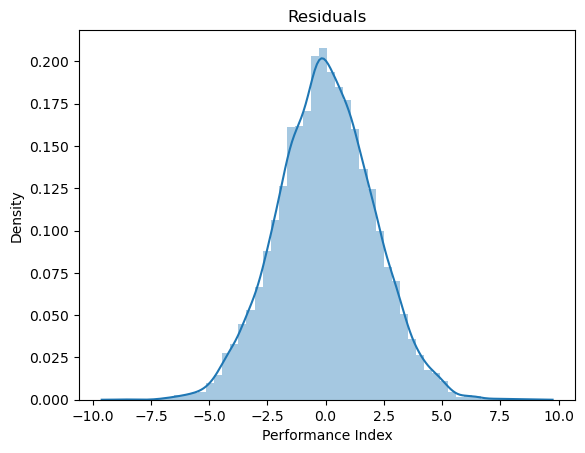

In [16]:
sns.distplot(y_train - y_train_pred)
plt.title('Residuals')

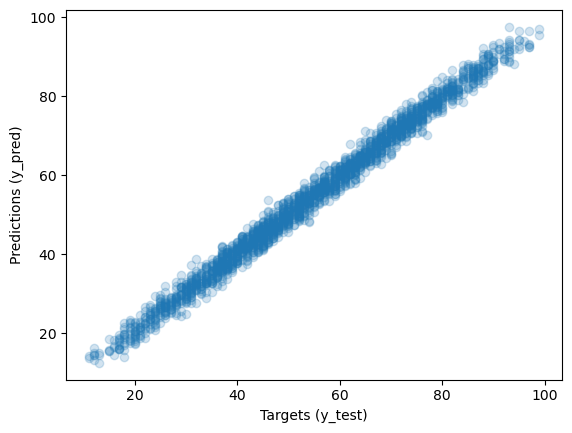

In [17]:
plt.scatter(y_test, y_test_pred, alpha=0.2)
plt.xlabel('Targets (y_test)')
plt.ylabel('Predictions (y_pred)')
plt.show()

### Lasso

In [19]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [20]:
y_train_lasso_pred = lasso.predict(x_train)
y_test_lasso_pred = lasso.predict(x_test)

In [21]:
train_r2_lasso = r2_score(y_train, y_train_lasso_pred)
test_r2_lasso = r2_score(y_test, y_test_lasso_pred)

In [22]:
print(f"Train R^2 (Lasso): {train_r2_lasso}")
print(f"Test R^2 (Lasso): {test_r2_lasso}")
print(f"Train MSE (Lasso): {mean_squared_error(y_train, y_train_lasso_pred)}")
print(f"Test MSE (Lasso): {mean_squared_error(y_test, y_test_lasso_pred)}")

Train R^2 (Lasso): 0.9885546463662386
Test R^2 (Lasso): 0.9887332969640201
Train MSE (Lasso): 4.219592491107085
Test MSE (Lasso): 4.1752724515261725


C:\Users\Micha\AppData\Local\Temp\ipykernel_22960\3822614601.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_lasso_pred)


Text(0.5, 1.0, 'Residuals')

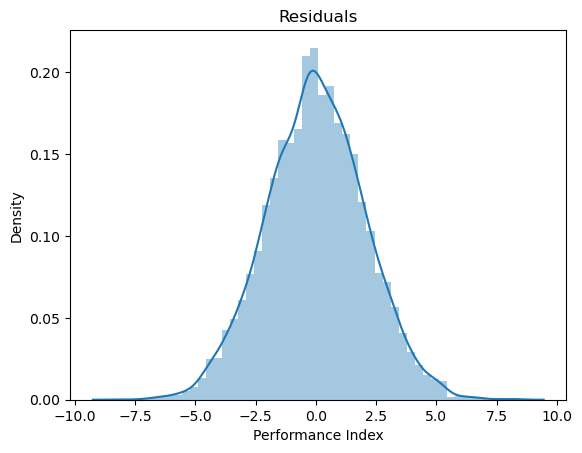

In [23]:
sns.distplot(y_train - y_train_lasso_pred)
plt.title('Residuals')

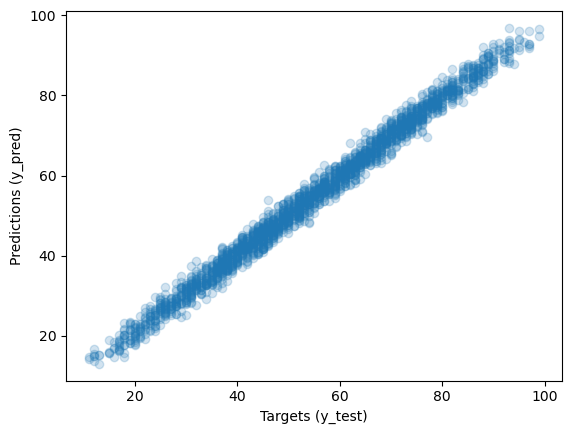

In [24]:
plt.scatter(y_test, y_test_lasso_pred, alpha=0.2)
plt.xlabel('Targets (y_test)')
plt.ylabel('Predictions (y_pred)')
plt.show()

# Testing

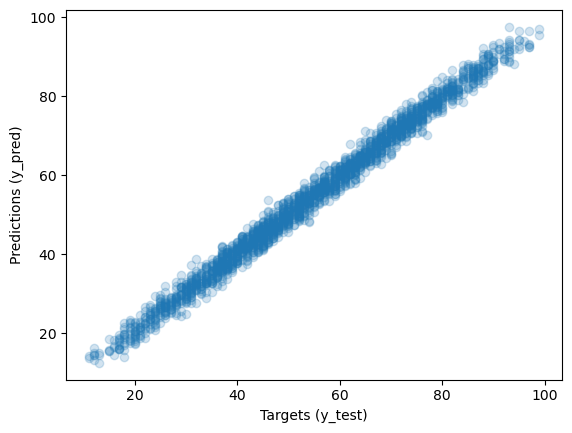

In [29]:
plt.scatter(y_test, y_test_pred, alpha=0.2)
plt.xlabel('Targets (y_test)')
plt.ylabel('Predictions (y_pred)')
plt.show()

In [31]:
df_pf = pd.DataFrame(y_test_pred, columns=['Predictions'])
df_pf

,Predictions
0,54.711894
1,22.619676
2,47.904077
3,31.292795
4,43.006105
...,...
1995,46.887329
1996,62.697084
1997,16.798247
1998,63.342276


In [33]:
df_pf['Target'] = y_test
df_pf.head(6)

,Predictions,Target
0,54.711894,91.0
1,22.619676,NaN
2,47.904077,NaN
3,31.292795,36.0
4,43.006105,NaN
5,59.070771,NaN


In [35]:
y_test = y_test.reset_index(drop=True)
y_test

0       51.0
1       20.0
2       46.0
3       28.0
4       41.0
        ... 
1995    45.0
1996    66.0
1997    16.0
1998    65.0
1999    47.0
Name: Performance Index, Length: 2000, dtype: float64

In [37]:
df_pf['Target'] = y_test
df_pf

,Predictions,Target
0,54.711894,51.0
1,22.619676,20.0
2,47.904077,46.0
3,31.292795,28.0
4,43.006105,41.0
...,...,...
1995,46.887329,45.0
1996,62.697084,66.0
1997,16.798247,16.0
1998,63.342276,65.0


In [39]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions'] # Actual observed value - predicted value

In [41]:
df_pf['Difference%'] = np.absolute(df_pf['Residual'] / df_pf['Target'] * 100)
df_pf

,Predictions,Target,Residual,Difference%
0,54.711894,51.0,-3.711894,7.278223
1,22.619676,20.0,-2.619676,13.098380
2,47.904077,46.0,-1.904077,4.139298
3,31.292795,28.0,-3.292795,11.759983
4,43.006105,41.0,-2.006105,4.892939
...,...,...,...,...
1995,46.887329,45.0,-1.887329,4.194063
1996,62.697084,66.0,3.302916,5.004418
1997,16.798247,16.0,-0.798247,4.989044
1998,63.342276,65.0,1.657724,2.550344


In [43]:
pd.options.display.max_rows = 999
df_pf.sort_values(by=['Difference%']).round(2)

,Predictions,Target,Residual,Difference%
309,78.00,78.0,-0.00,0.00
953,90.00,90.0,0.00,0.00
772,55.00,55.0,-0.00,0.01
837,79.01,79.0,-0.01,0.02
1097,78.01,78.0,-0.01,0.02
...,...,...,...,...
216,13.72,11.0,-2.72,24.74
321,14.99,12.0,-2.99,24.94
1368,22.51,18.0,-4.51,25.06
264,14.13,11.0,-3.13,28.48


In [45]:
data.head(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0


In [47]:
new_df = pd.DataFrame({'Hours Studied': [7, 4, 8], 'Previous Scores': [99, 82, 51], 'Extracurricular Activities': [1,0,1],
                       'Sleep Hours': [9,4,7], 'Sample Question Papers Practiced': [1,2,2]})
new_df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2


In [49]:
scaled_df = scaler.transform(new_df)

In [51]:
data['Performance Index'].max()

100.0

In [387]:
new_df['Linear Regression Pred'] = lr.predict(scaled_df)
new_df['Ridge Prediction'] = ridge.predict(scaled_df)
new_df['Lasso Prediction'] = lasso.predict(scaled_df)
new_df.round(2)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Linear Regression Pred,Ridge Prediction,Lasso Prediction
0,7,99,1,9,1,91.85,91.82,91.45
1,4,82,0,4,2,63.16,63.17,63.48
2,8,51,1,7,2,45.05,45.10,45.05
